참고: [데이터 사이언스 스쿨](https://datascienceschool.net/view-notebook/69278a5de79449019ad1f51a614ef87c/)
# Kernel SVM
퍼셉트론이나 SVM과 같은 선형 분류 모형은 XOR 문제를 풀지 못한다는 단점이 있다. XOR은 다음과 같이 클래스가 나누어진다.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import matplotlib as mpl

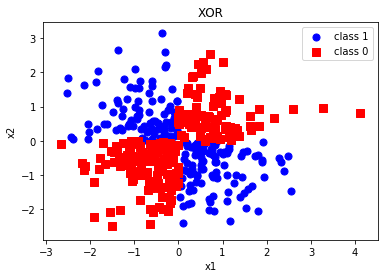

In [47]:
np.random.seed(2)
X = np.random.randn(400,2)
y = np.logical_xor(X[:,0]>0, X[:,1]>0)
plot_xor(X,y) # 맨 아래에 함수 정의 있음

## XOR 문제는 선형 SVM으로 풀 수 없는 대표적인 문제

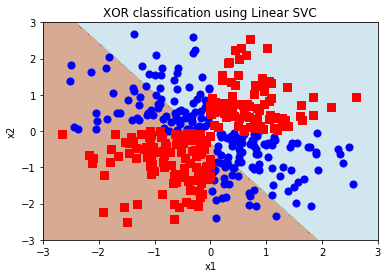

In [68]:
svc = SVC(kernel="linear").fit(X, y)
# 맨 아래에 plot_svm()함수 정의 있음
plot_svm(X, y, svc, "XOR classification using Linear SVC")

## 그래서 kernel SVM을 사용합니다.
## 1. 다항 커널 (kernel = 'poly')

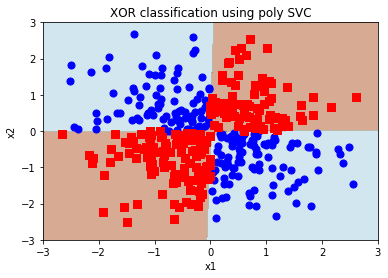

In [67]:
poly_svm = SVC(kernel='poly', degree=2, gamma=1, coef0=0).fit(X,y)
plot_svm(X, y, poly_svm, "XOR classification using poly SVC")

## 2. RBF 커널 (kernel = 'rbf') 또는 (kernel = None)

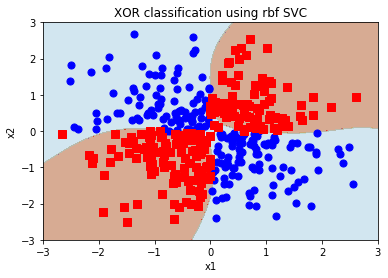

In [69]:
rbf_svm = SVC(kernel='rbf').fit(X,y)
plot_xor(X, y, rbf_svm, "XOR classification using rbf SVC")

## Sigmoid 커널 (kernel = 'sigmoid')

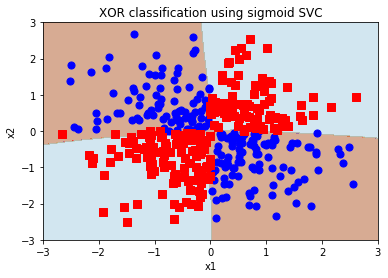

In [70]:
sigmoid_svm = SVC(kernel='sigmoid', gamma=2, coef0=2).fit(X,y)
plot_xor(X, y, sigmoid_svm, "XOR classification using sigmoid SVC")

# 커널 파라미터의 영향
## gamma를 바꾸면?

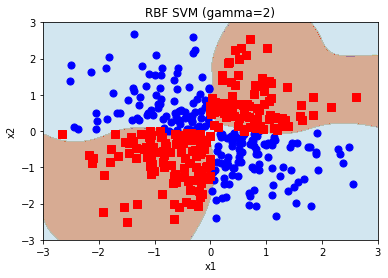

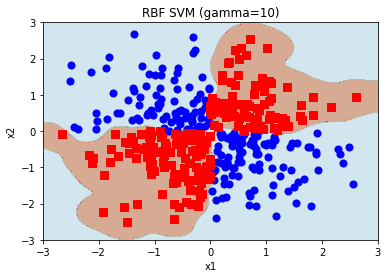

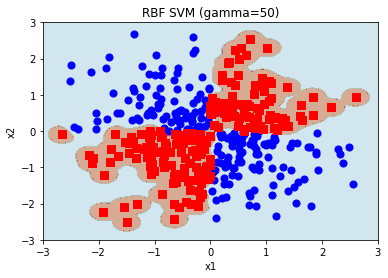

In [ ]:
plot_svm(X, y, SVC(kernel="rbf", gamma=2).fit(X, y), "RBF SVM (gamma=2)")
plot_svm(X, y, SVC(kernel="rbf", gamma=10).fit(X, y), "RBF SVM (gamma=10)")
plot_svm(X, y, SVC(kernel="rbf", gamma=50).fit(X, y), "RBF SVM (gamma=50)")
plot_svm(X, y, SVC(kernel="rbf", gamma=100).fit(X, y), "RBF SVM (gamma=100)")

In [66]:
def plot_svm(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(
        np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b',
                marker='o', label='class 1', s=50)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r',
                marker='s', label='class 0', s=50)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

In [46]:
def plot_xor(X,y):
    X_xor = X
    y_xor = np.where(y, 1, 0)
    plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
                c='b', marker='o', label='class 1', s=50)
    plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1],
                c='r', marker='s', label= 'class 0', s=50)
    plt.legend()
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("XOR")
    plt.show()